# **Trabalho Prático**

*Disciplina:* Introdução ao Processamento Digital de Imagens

*Professor:* Leonardo Vidal Batista

*Grupo:*

> [20210024326] Ana Carolina Rodrigues Lima de Aguiar
> 
> [20210025806] Cassiano Sabino
> 
> [20210024729] Geovana Maria dos Santos Lima

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import numpy as np
import math

# img = Image.open('drive/MyDrive/2022.2_PDI/bob_esponja.jpg')
# img = Image.open('drive/MyDrive/2022.2_PDI/testpat.1k.color2.tif')
img = Image.open('drive/MyDrive/2022.2_PDI/DancingInWater.jpg')
# img = Image.open('drive/MyDrive/2022.2_PDI/testes.png')
display(img)

## **1. Conversão RGB-YIQ-RGB**

In [35]:
def truncate(value):
  if(value > 255):
      value = 255
  if(value < 0):
      value = 0
  return value

In [4]:
def conversor_rgb_yiq(rgb):
  width = len(rgb[0][0])
  height = len(rgb[0])

  Y = [[0]*width for _ in range(height)]
  I = [[0]*width for _ in range(height)]
  Q = [[0]*width for _ in range(height)]

  R, G, B = rgb

  for m in range(0, height):
    for n in range(0, width):
      pixel = [R[m][n], G[m][n], B[m][n]]
      y = (0.299*pixel[0]) + (0.587*pixel[1]) + (0.114*pixel[2])
      i = (0.596*pixel[0]) + (-0.274*pixel[1]) + (-0.322*pixel[2])
      q = (0.211*pixel[0]) + (-0.523*pixel[1]) + (0.312*pixel[2])

      Y[m][n] = y
      I[m][n] = i
      Q[m][n] = q

  return [Y,I,Q]

In [5]:
def conversor_yiq_rgb(yiq):
  width = len(yiq[0][0])
  height = len(yiq[0])

  Y, I, Q = yiq

  R = [[0]*width for _ in range(height)]
  G = [[0]*width for _ in range(height)]
  B = [[0]*width for _ in range(height)]

  for m in range(0, height):
    for n in range(0, width):
      pixel = [Y[m][n], I[m][n], Q[m][n]]
      r = (1.000*pixel[0]) + (0.956*pixel[1]) + (0.621*pixel[2])
      g = (1.000*pixel[0]) + (-0.272*pixel[1]) + (-0.647*pixel[2])
      b = (1.000*pixel[0]) + (-1.106*pixel[1]) + (1.703*pixel[2])

      r = truncate(r)
      g = truncate(g)
      b = truncate(b)

      R[m][n] = r
      G[m][n] = g
      B[m][n] = b

  return [R, G, B]

In [6]:
def conversor_array(lista):
  width = len(lista[0][0])
  height = len(lista[0])

  P = [[0]*width for _ in range(height)]

  for m in range(0, height):
    for n in range(0, width):
      pixel = [lista[0][m][n], lista[1][m][n], lista[2][m][n]]

      P[m][n] = [pixel[0], pixel[1], pixel[2]]

  return P

In [7]:
def conversor_bandas(imagem):

  img_rgb = img.split()
  width, height = img.size

  R = [[0]*width for _ in range(height)]
  G = [[0]*width for _ in range(height)]
  B = [[0]*width for _ in range(height)]

  banda1, banda2, banda3 = img_rgb

  for m in range(0, height):
    for n in range(0, width):
      pixel = [banda1.getpixel((n,m)), banda2.getpixel((n,m)), banda3.getpixel((n,m))]

      R[m][n] = pixel[0]
      G[m][n] = pixel[1]
      B[m][n] = pixel[2]

  return [R,G,B]

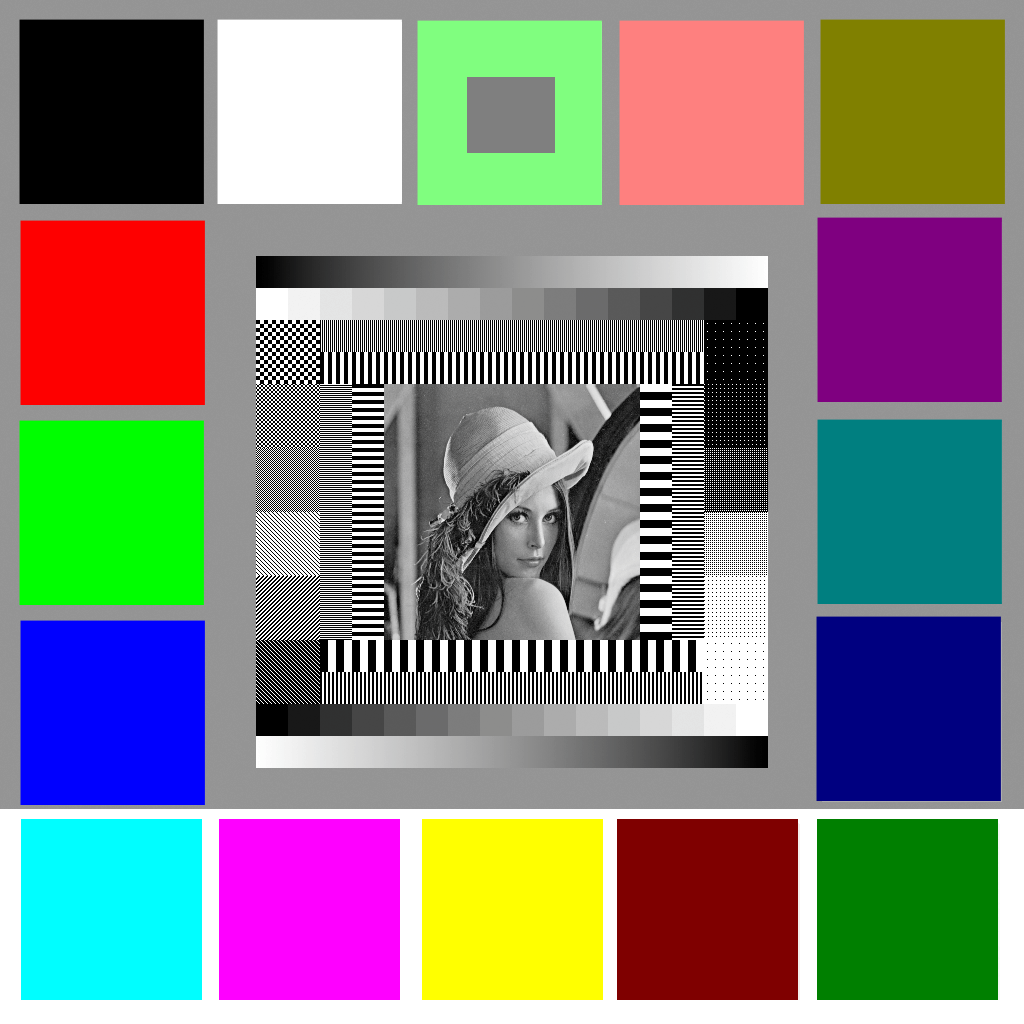

In [8]:
bandas_rgb = conversor_bandas(img)
img_result_yiq = conversor_rgb_yiq(bandas_rgb)
img_result_rgb = conversor_yiq_rgb(img_result_yiq)
img_final = conversor_array(img_result_rgb)
banda1 = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(banda1, "RGB")
new_image

## **2. Negativo**

In [34]:
def negativo(bandas, in_Y=False):

  width = len(bandas[0][0])
  height = len(bandas[0])

  if(in_Y == False):

    for b in range(len(bandas)):
      for i in range(height):
        for j in range(width):
          bandas[b][i][j] = 255 - bandas[b][i][j] # Seguindo: s = L-1-r
  else:

    for i in range(height):
        for j in range(width):
          bandas[0][i][j] = 255 - bandas[0][i][j] # Seguindo: s = L-1-r
          
  return bandas

### *2.1. Teste Negativo em Y*

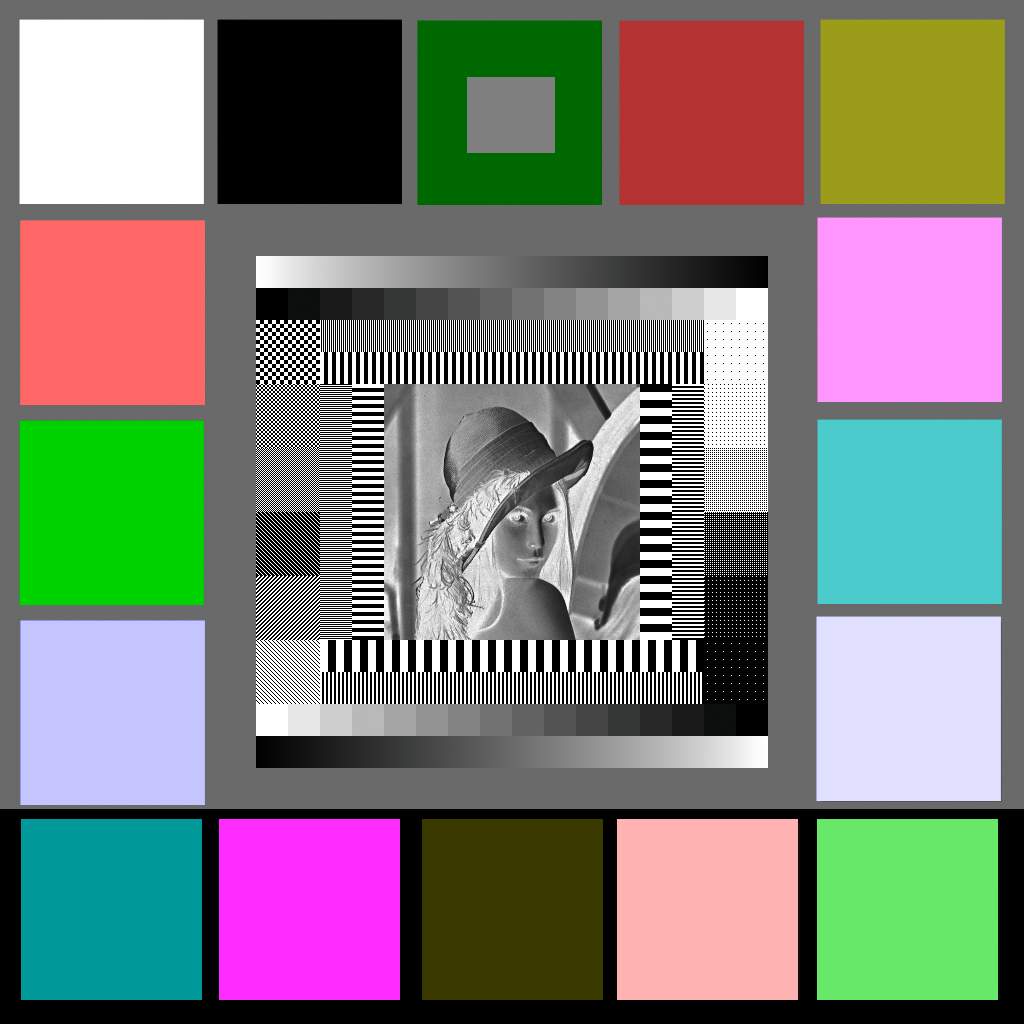

In [ ]:
bandas_rgb = conversor_bandas(img)
img_yiq = conversor_rgb_yiq(bandas_rgb)
img_neg = negativo(img_yiq, True)
img_result = conversor_yiq_rgb(img_neg)
img_final = conversor_array(img_result)
bandas = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas, "RGB")
new_image

### *2.2. Teste Negativo em RGB*

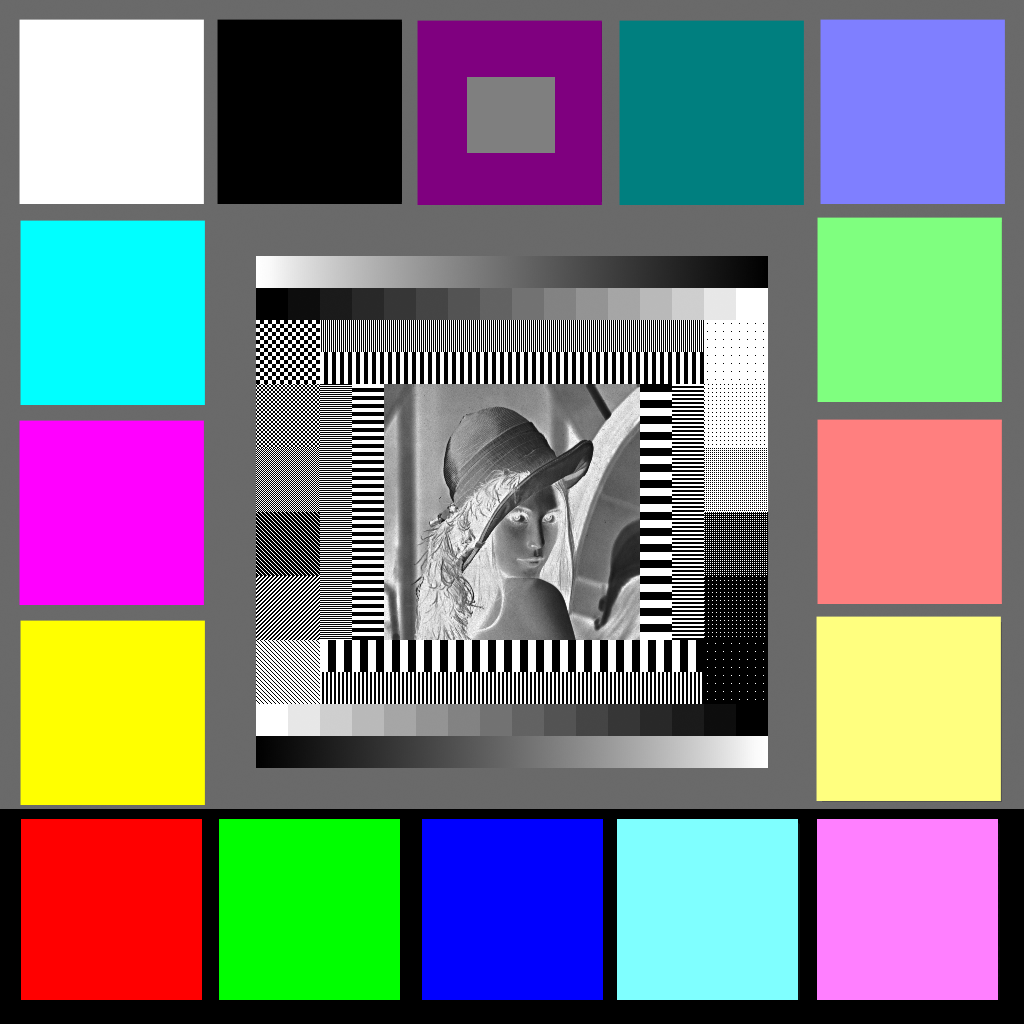

In [ ]:
bandas_rgb2 = conversor_bandas(img)
img_neg2 = negativo(bandas_rgb2)
img_final2 = conversor_array(img_neg2)
bandas2 = np.array(img_final2, dtype='uint8')
new_image2 = Image.fromarray(bandas2, "RGB")
new_image2

## **3. Correlação m x n**

In [9]:
def tratamento(valor_mascara:str):
  
  if('/' in valor_mascara):
    operandos = valor_mascara.split("/")
    return (int(operandos[0])/int(operandos[1]))
  elif('*' in valor_mascara):
    operandos = valor_mascara.split("*")
    return (int(operandos[0])*int(operandos[1]))
  elif('+' in valor_mascara):
    operandos = valor_mascara.split("+")
    return (int(operandos[0])+int(operandos[1]))
  elif('-' in valor_mascara):
    operandos = valor_mascara.split("-")
    return (int(operandos[0])-int(operandos[1]))

In [10]:
def getMask(arquivo):
  with open(arquivo, "r") as file:
    dados = file.read()
  
  mascara, offset = dados.split("\n@")

  offset = int(offset)

  mascara = mascara.split("\n")

  for i in range(len(mascara)):
    mascara[i] = mascara[i].split(" ")
    for j in range(len(mascara[i])):
      try:
        mascara[i][j] = int(mascara[i][j])
      except:
        mascara[i][j] = tratamento(mascara[i][j])

  if len(mascara) % 2 == 1 and len(mascara[0]) % 2 == 1:
    pivot = (len(mascara)//2, len(mascara[0])//2)
  else:
    pivot = [0,0]

  return (mascara, offset, pivot)

In [11]:
def produto_interno(vizinhanca, mascara):
    valor = 0

    for i in range(len(vizinhanca)):
        for j in range(len(vizinhanca[0])):
            valor += vizinhanca[i][j] * mascara[i][j]

    return valor

In [12]:
def correlacao(arquivo, bandas, absolute=False):
  mascara, offset, pivot = getMask(arquivo)

  width = len(bandas[0][0])
  height = len(bandas[0])

  img_final = []

  for i in range(len(bandas)):
    img_final.append([[0]*width for _ in range(height)])

  vizinhanca = ([[0]*len(mascara[0]) for _ in range(len(mascara))])

  for b in range(len(bandas)):
    for i in range(height):
      for j in range(width):

        aux = pivot
        for m in range(len(mascara)):
          for n in range(len(mascara[0])):
            try:
              vizinhanca[m][n] = bandas[b][i-aux[0]+m][j-aux[1]+n]
            except:
              vizinhanca[m][n] = 0

        if(absolute == False):
          img_final[b][i][j] = produto_interno(vizinhanca, mascara) + offset
        else:
          img_final[b][i][j] = abs(produto_interno(vizinhanca, mascara)) + offset

  
  return(img_final)

In [13]:
def truncate_correlation(bandas):

  for b in range(len(bandas)):
    for i in range(len(bandas[0])):
      for j in range(len(bandas[0][0])):
        bandas[b][i][j] = truncate(bandas[b][i][j])

  return bandas

### *3.1. Teste Correlação com filtro Soma*

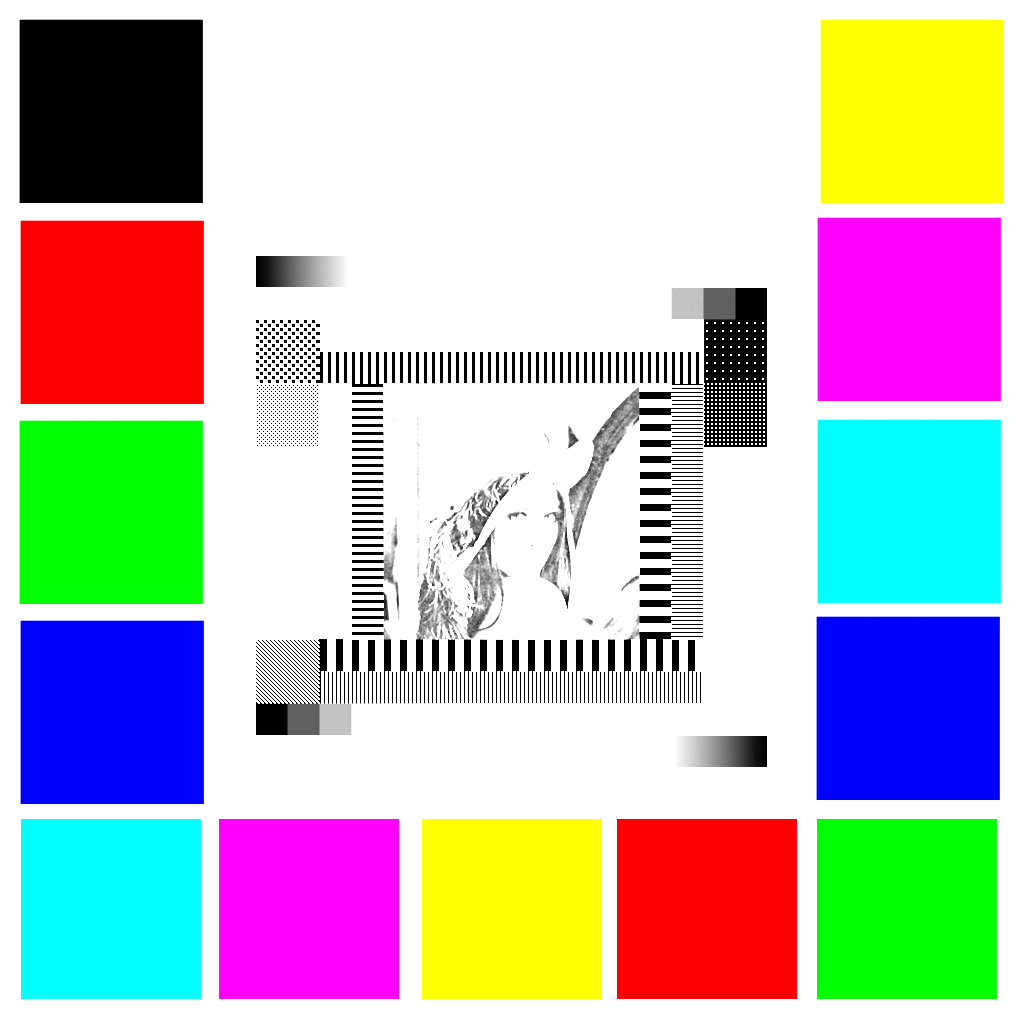

In [14]:
bandas_rgb = conversor_bandas(img)
img_result1 = correlacao("./soma.txt", bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

### *3.2. Teste Correlação com filtro Box*

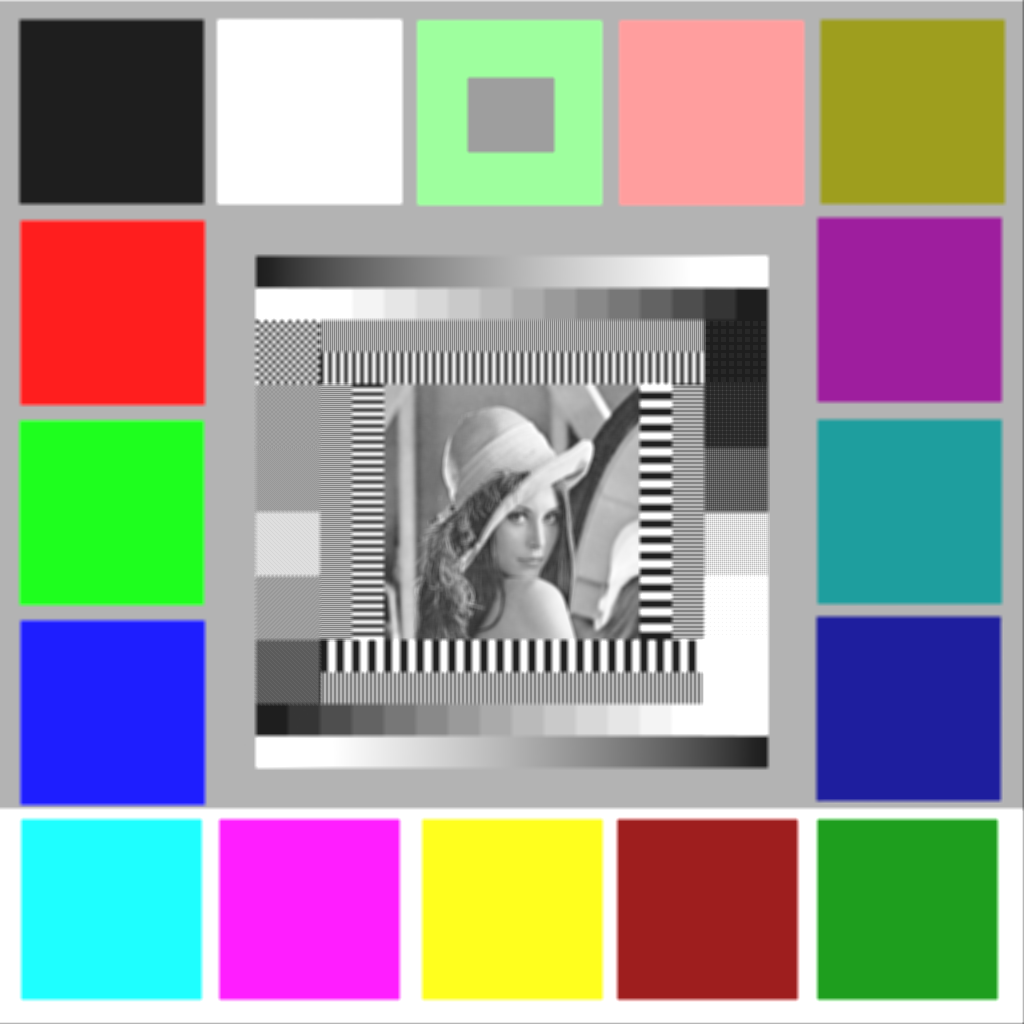

In [16]:
bandas_rgb = conversor_bandas(img)
img_result1 = correlacao("./box.txt", bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

#### a. Comparação (Box 1x11)(Box 11x1) com Box 11x11

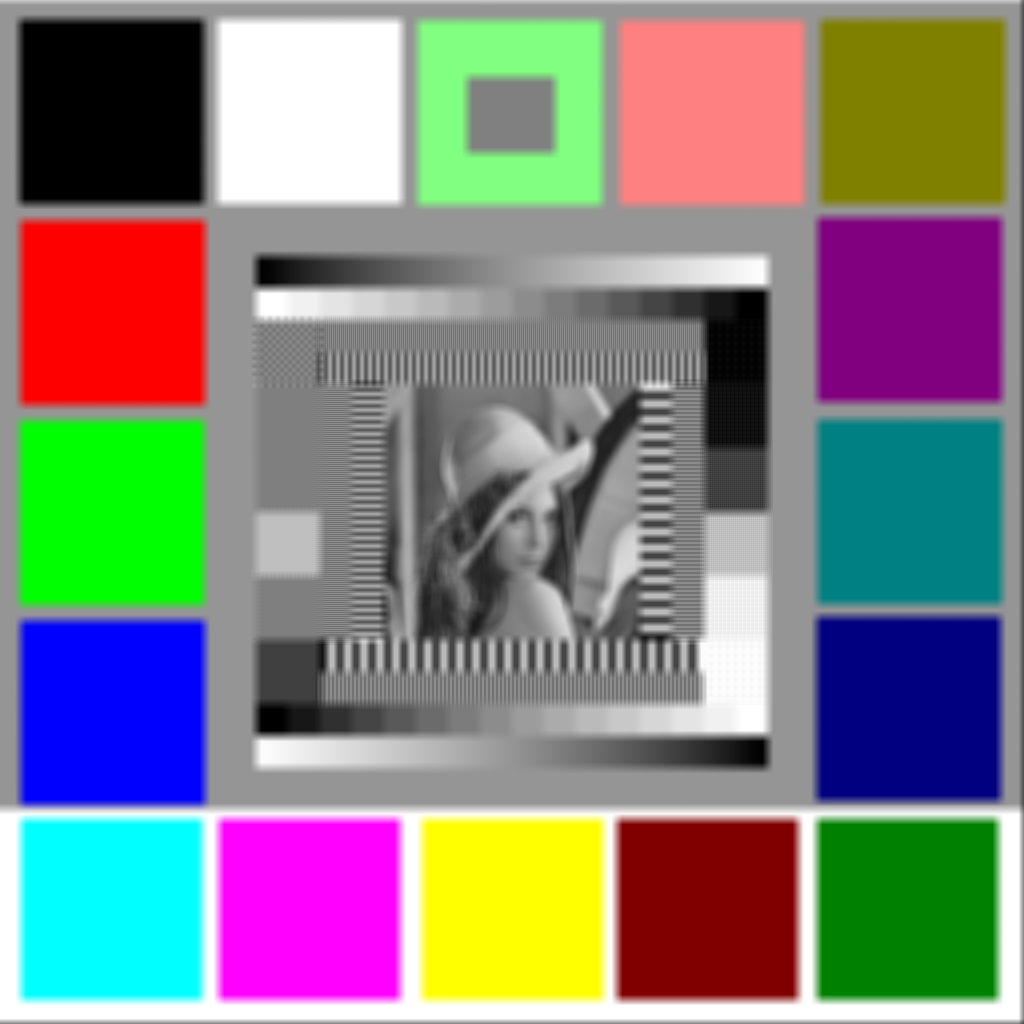

In [17]:
bandas_rgb = conversor_bandas(img)
img_result = correlacao("./box1x11.txt", bandas_rgb)
img_result2 = correlacao("./box11x1.txt", img_result)
truncate_correlation(img_result2)
img_final = conversor_array(img_result2)
bandas = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas, "RGB")
new_image

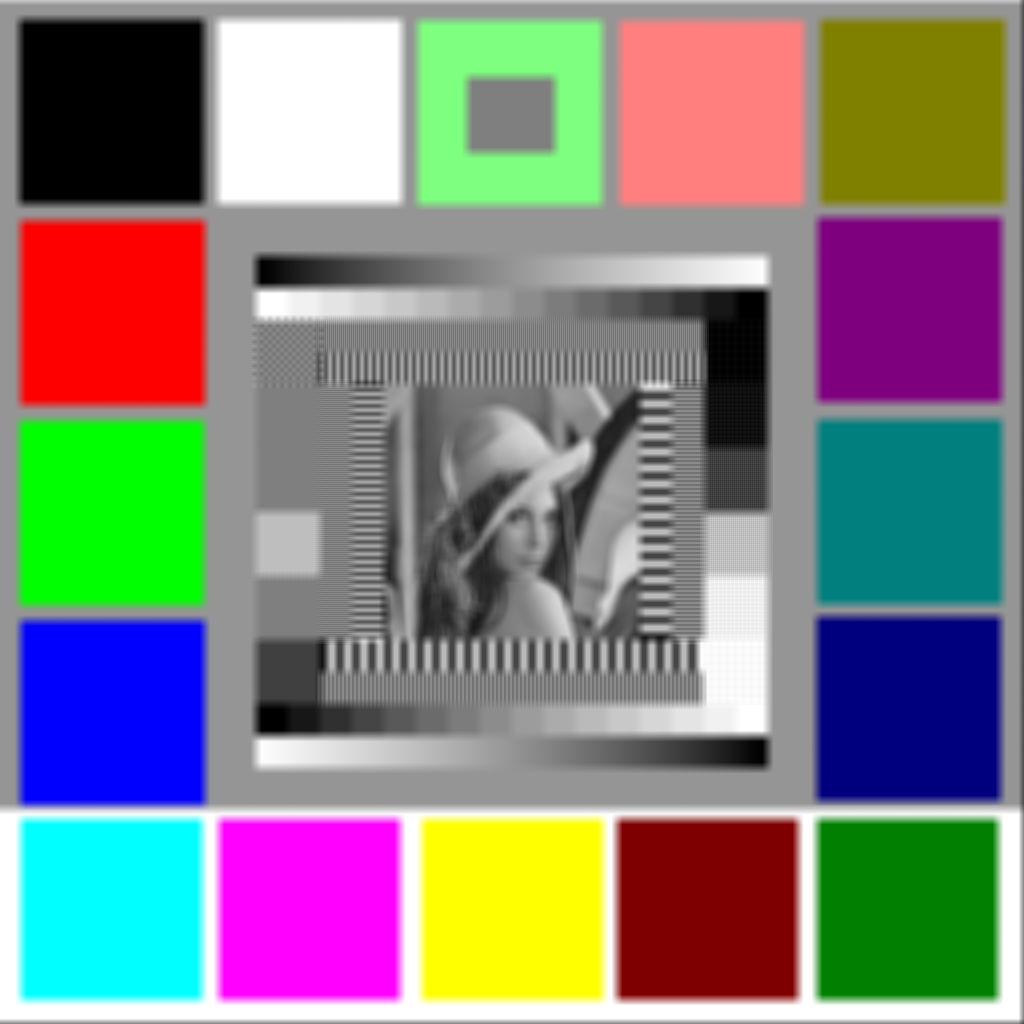

In [18]:
bandas_rgb = conversor_bandas(img)
img_result1 = correlacao("./box11x11.txt", bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

### *3.3. Teste Correlação com filtro Sobel*

In [15]:
def soma_array(banda1, banda2):
  bandas = []

  for i in range(len(banda1)):
    bandas.append([[0]*len(banda1[0][0]) for _ in range(len(banda1[0]))])

  for b in range(len(bandas)):
    for i in range(len(bandas[0])):
      for j in range(len(bandas[0][0])):
        bandas[b][i][j] = banda1[b][i][j] + banda2[b][i][j]

  return bandas

#### a. Teste Correlação com filtro Sobel Horizontal

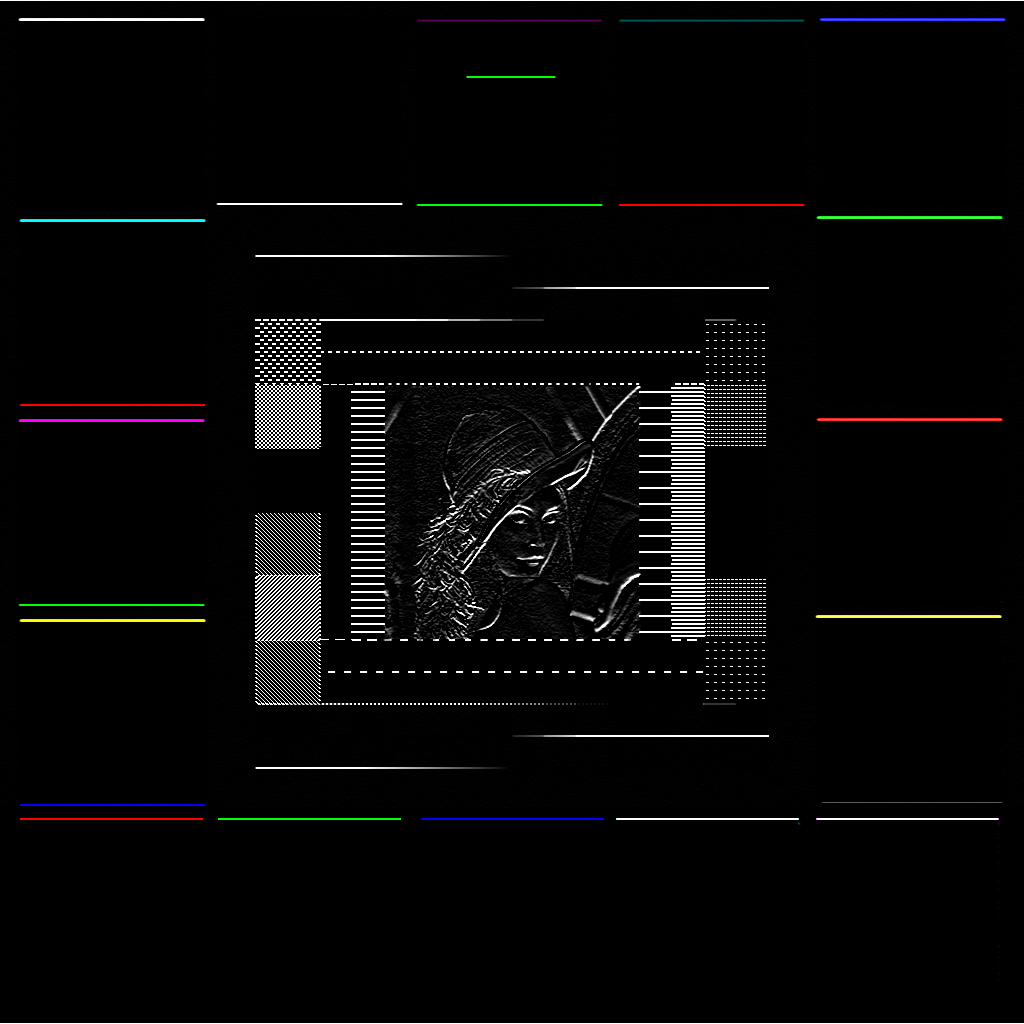

In [19]:
bandas_rgb = conversor_bandas(img)
img_result1 = correlacao("./sobel_horizontal.txt", bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

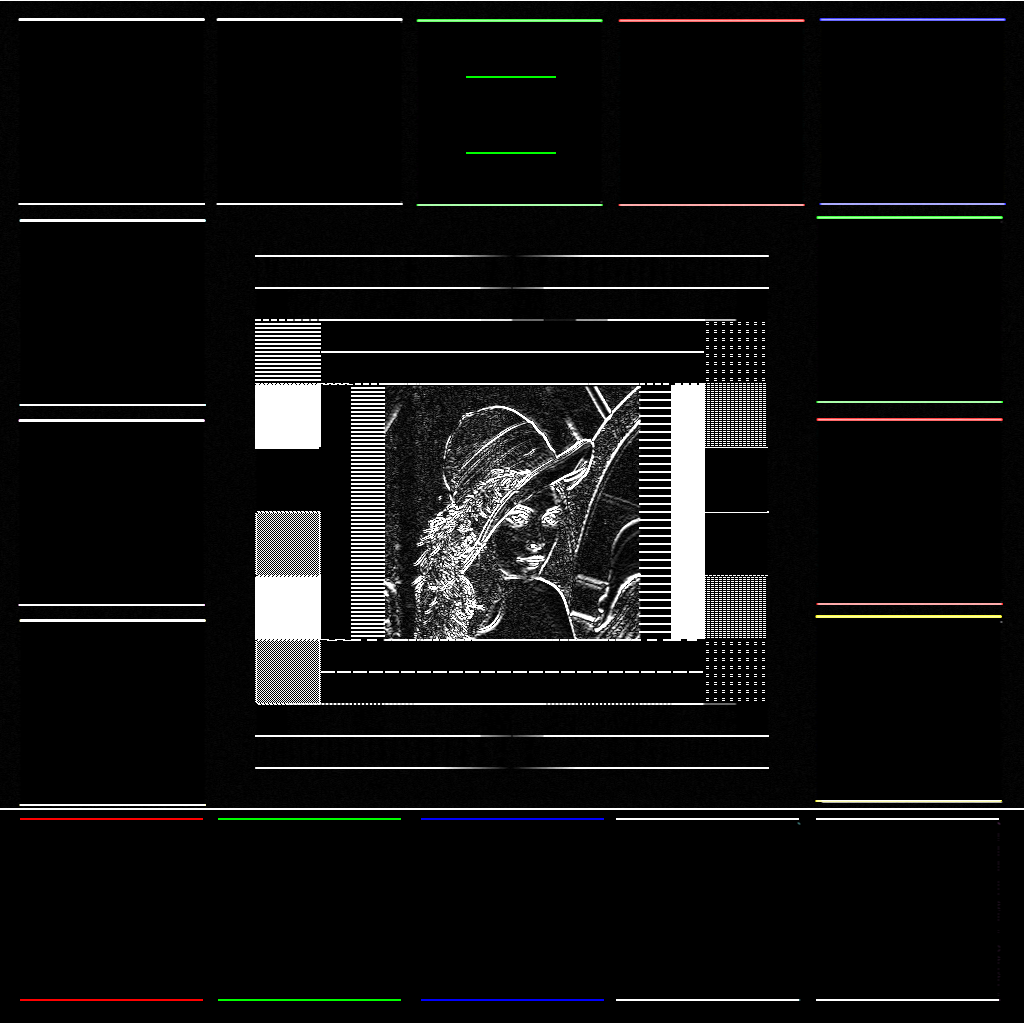

In [20]:
bandas_rgb = conversor_bandas(img)
img_result1 = correlacao("./sobel_horizontal_up.txt", bandas_rgb, True)
img_result2 = correlacao("./sobel_horizontal_down.txt", bandas_rgb, True)
img_result = soma_array(img_result1, img_result2)
truncate_correlation(img_result)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

#### b. Teste Correlação com filtro Sobel Vertical

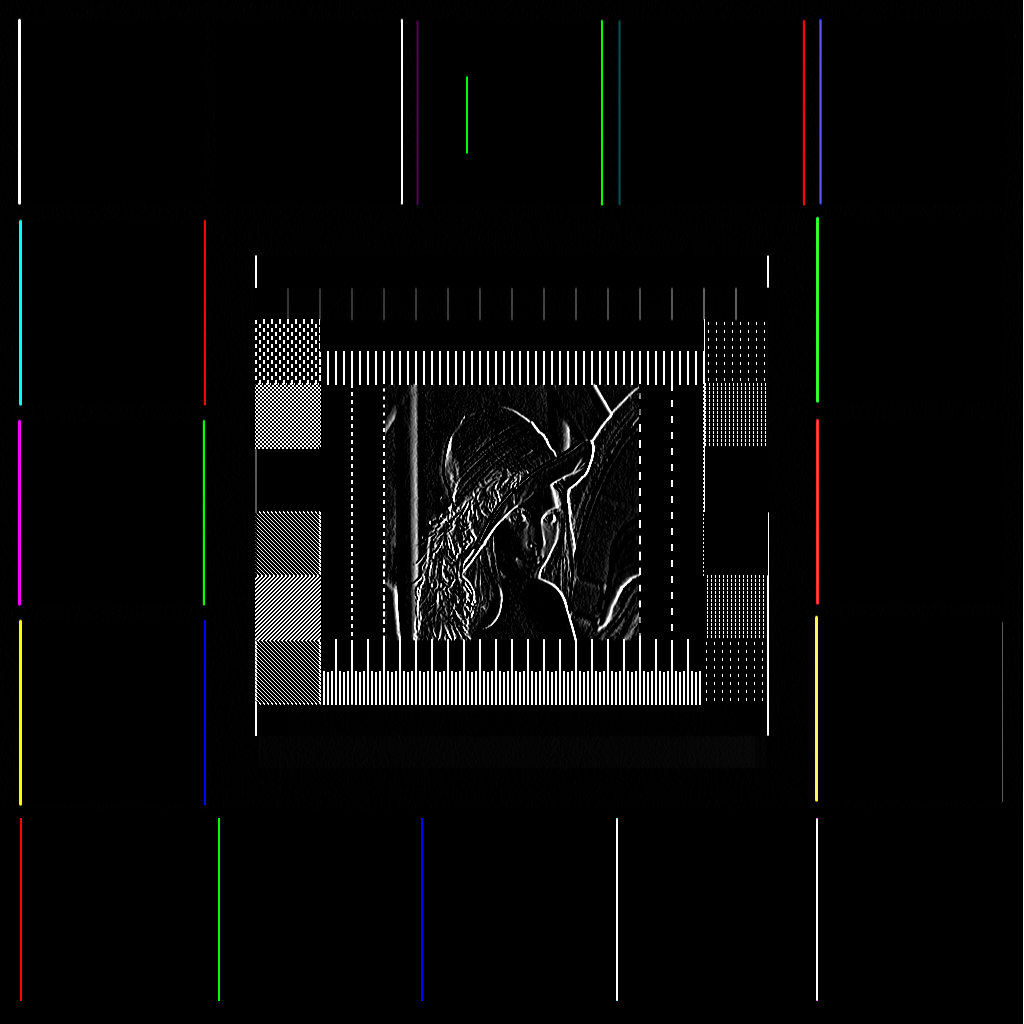

In [21]:
bandas_rgb = conversor_bandas(img)
img_result1 = correlacao("./sobel_vertical.txt", bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

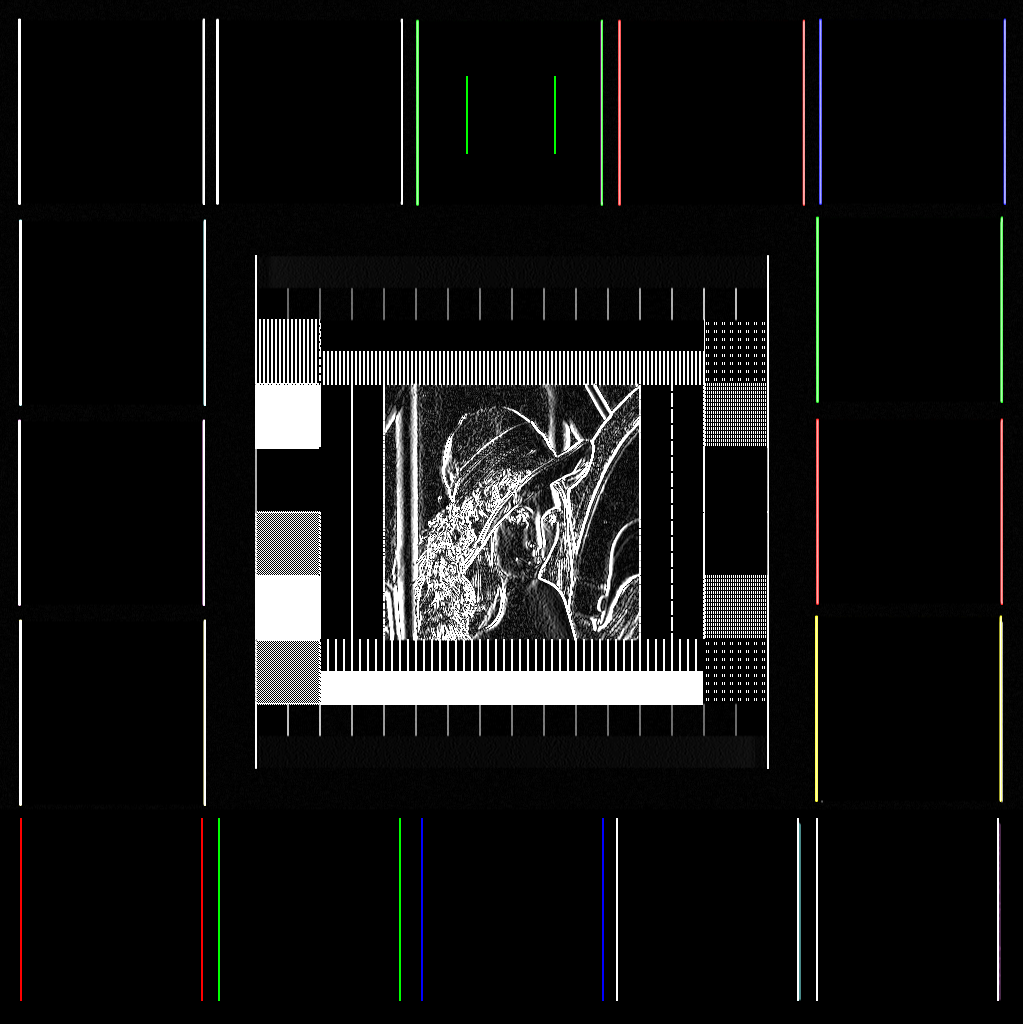

In [22]:
bandas_rgb = conversor_bandas(img)
img_result1 = correlacao("./sobel_vertical_left.txt", bandas_rgb, True)
img_result2 = correlacao("./sobel_vertical_right.txt", bandas_rgb, True)
img_result = soma_array(img_result1, img_result2)
truncate_correlation(img_result)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

#### c. Teste Correlação com Sobel Horizontal e Vertical

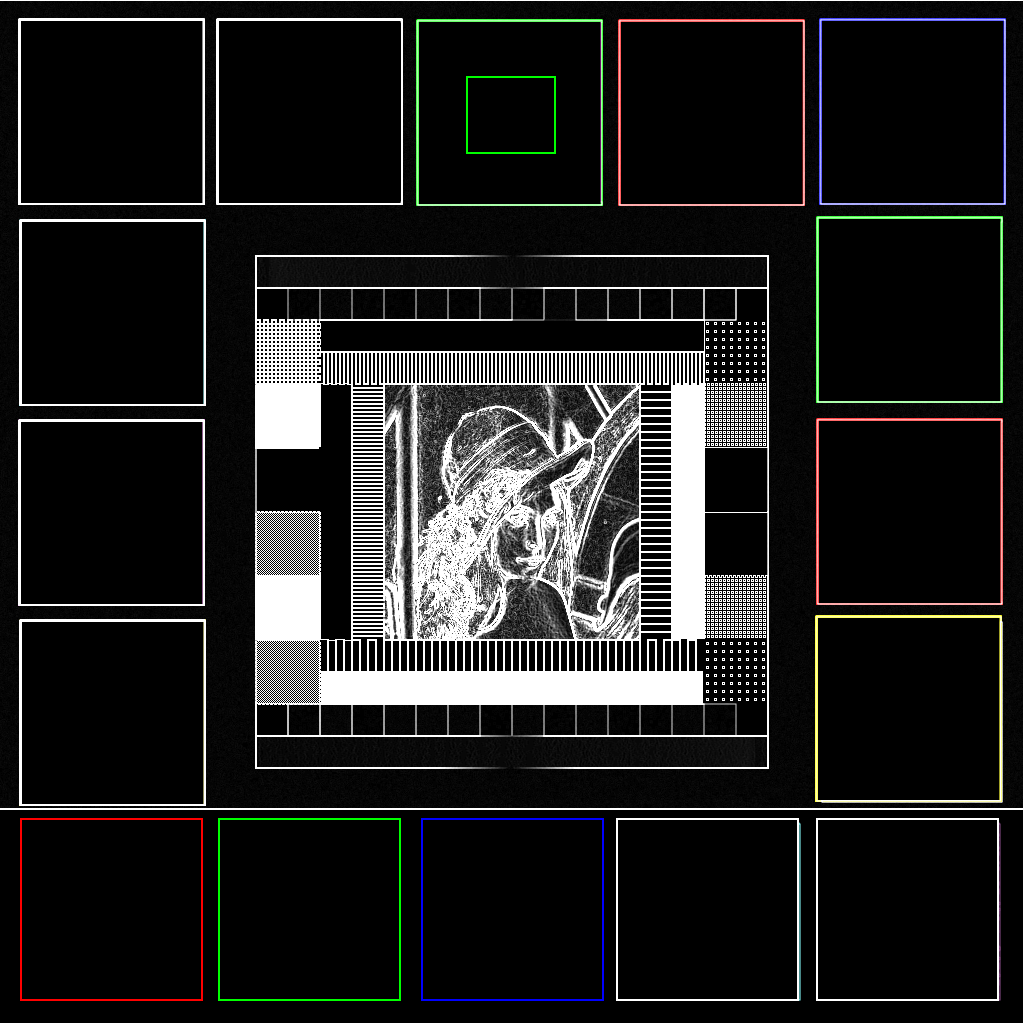

In [23]:
bandas_rgb = conversor_bandas(img)
img_result1 = correlacao("./sobel_horizontal_up.txt", bandas_rgb, True)
img_result2 = correlacao("./sobel_horizontal_down.txt", bandas_rgb, True)
img_result3 = correlacao("./sobel_vertical_left.txt", bandas_rgb, True)
img_result4 = correlacao("./sobel_vertical_right.txt", bandas_rgb, True)

img_result_h = soma_array(img_result1, img_result2)
img_result_v = soma_array(img_result3, img_result4)

img_result = soma_array(img_result_h, img_result_v)

truncate_correlation(img_result)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')

new_image = Image.fromarray(bandas_final, "RGB")
new_image

### *3.4. Teste Correlação Sobel com Expansão de Histograma*

In [24]:
def expansao_histograma(bandas, L):
    
    width = len(bandas[0][0])
    height = len(bandas[0])

    maior = 0
    menor = 3000
    for b in bandas:
        for i in bandas[0]:
            if(max(i) > maior):
                maior = max(i)
            if(min(i) < menor):
                menor = min(i)

    for b in range(len(bandas)):
        for i in range(0, height):
            for j in range(0, width):
                r = bandas[b][i][j]
                bandas[b][i][j] = round(((r - menor)/(maior-menor)) * (L-1))

#### a. Teste Expansão de Histograma

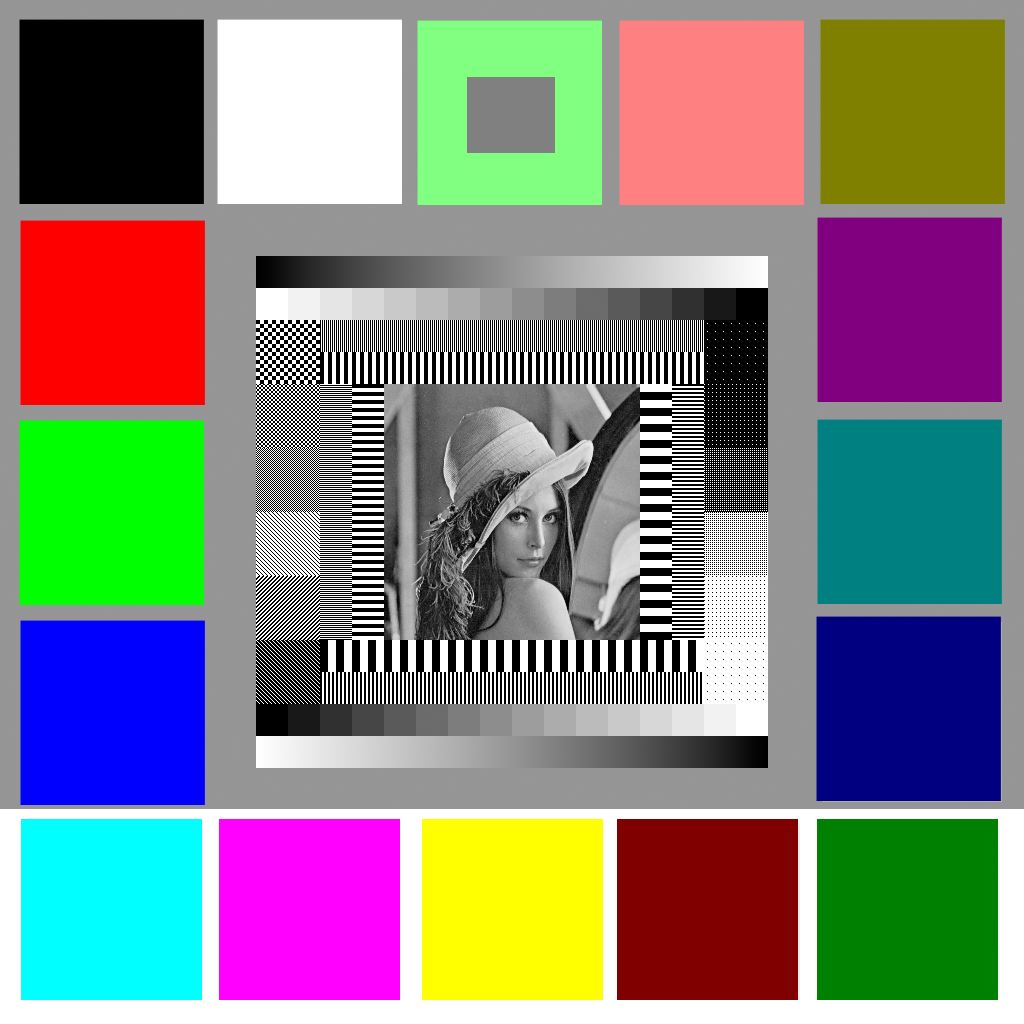

In [25]:
bandas = conversor_bandas(img)
expansao_histograma(bandas, 256)
img_final = conversor_array(bandas)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

#### b. Teste Sobel com Expansão de Histograma

In [26]:
def sobel(img, L):
  bandas_rgb = conversor_bandas(img)
  img_result1 = correlacao("./sobel_horizontal.txt", bandas_rgb)
  img_result2 = correlacao("./sobel_vertical.txt", bandas_rgb)

  img_result = soma_array(img_result1, img_result2)
  expansao_histograma(img_result, L)
  img_final = conversor_array(img_result)
  bandas_final = np.array(img_final, dtype='uint8')

  new_image = Image.fromarray(bandas_final, "RGB")
  return new_image

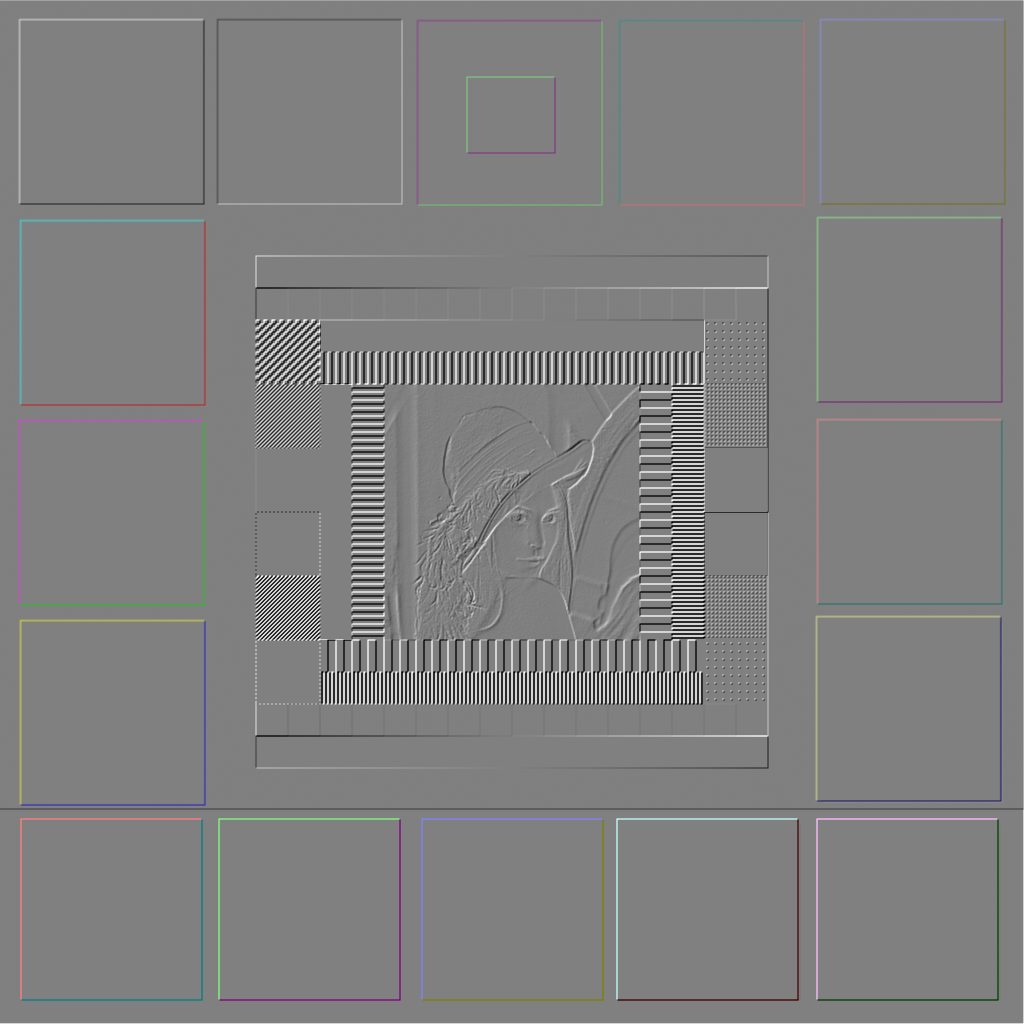

In [27]:
sobel(img, 256)

In [28]:
def sobel2(img, L):
  bandas_rgb = conversor_bandas(img)
  img_result1 = correlacao("./sobel_horizontal_up.txt", bandas_rgb, True)
  img_result2 = correlacao("./sobel_horizontal_down.txt", bandas_rgb, True)
  img_result3 = correlacao("./sobel_vertical_left.txt", bandas_rgb, True)
  img_result4 = correlacao("./sobel_vertical_right.txt", bandas_rgb, True)

  img_result_h = soma_array(img_result1, img_result2)
  img_result_v = soma_array(img_result3, img_result4)

  img_result = soma_array(img_result_h, img_result_v)

  expansao_histograma(img_result, L)
  img_final = conversor_array(img_result)
  bandas_final = np.array(img_final, dtype='uint8')

  new_image = Image.fromarray(bandas_final, "RGB")
  return new_image

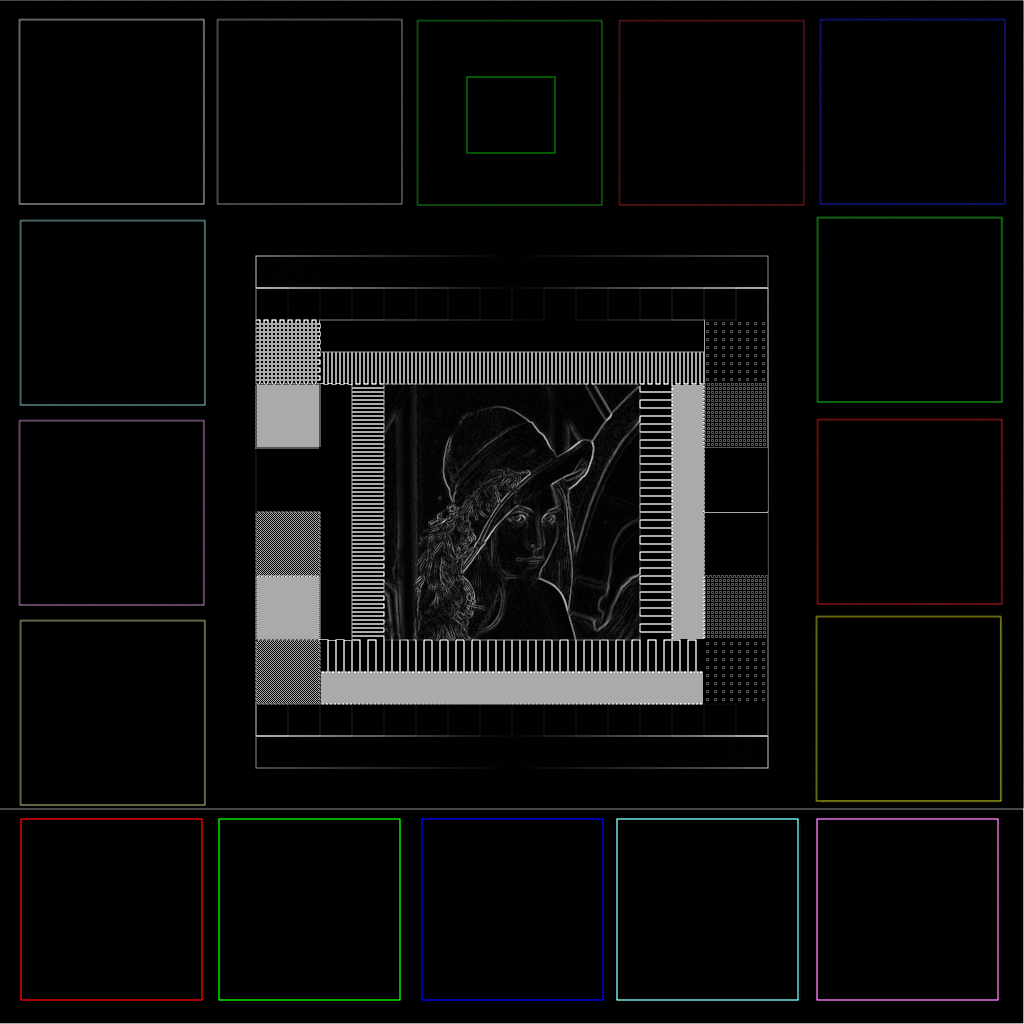

In [29]:
sobel2(img, 256)

### *3.5. Testes Correlação com filtro Emboss*

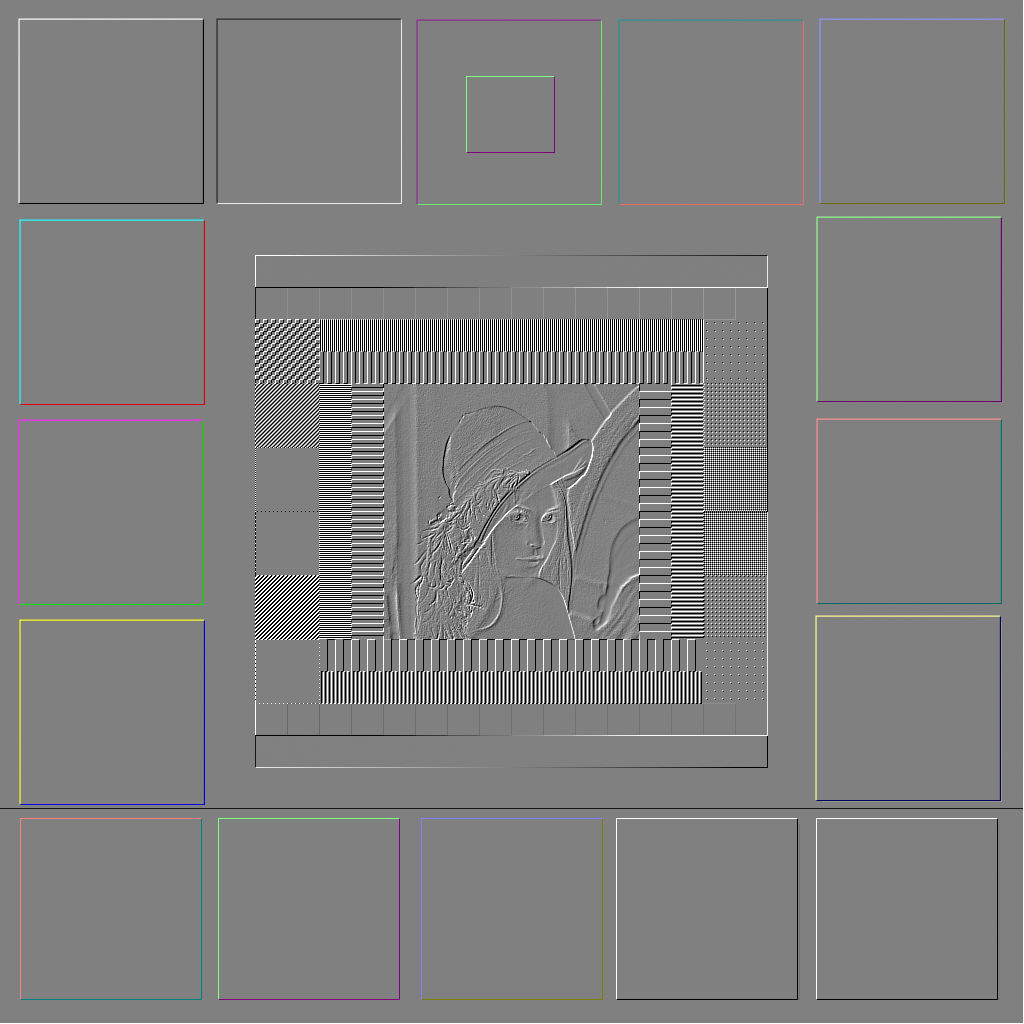

In [36]:
bandas_rgb = conversor_bandas(img)
img_result1 = correlacao("./emboss.txt", bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

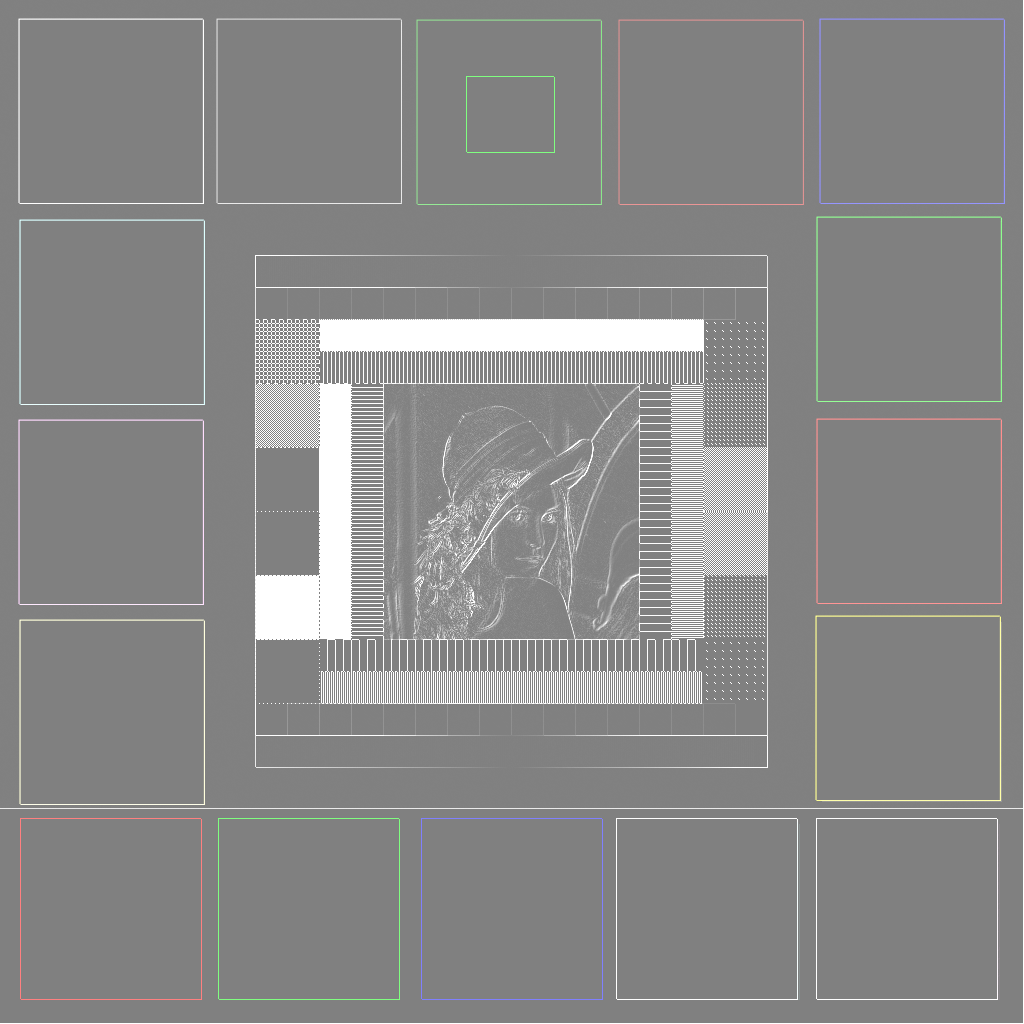

In [31]:
bandas_rgb = conversor_bandas(img)
img_result = correlacao("./emboss.txt", bandas_rgb, True)
truncate_correlation(img_result)
img_final = conversor_array(img_result)
bandas = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas, "RGB")
new_image

## **4. Mediana**

In [32]:
def mediana(m, n, bandas):

  width = len(bandas[0][0])
  height = len(bandas[0])

  img_final = []

  pivot = [m//2, n//2]
  
  for i in range(len(bandas)):
    img_final.append([[0]*width for _ in range(height)])

  vizinhanca = []

  for b in range(len(bandas)):
    for i in range(height):
      for j in range(width):

        aux = pivot
        for r in range(m):
          for s in range(n):
            try:
              vizinhanca.append(bandas[b][i-aux[0]+r][j-aux[1]+s])
            except:
              vizinhanca.append(0)

        vizinhanca.sort()
        if(m != 1 and n != 1):
          img_final[b][i][j] = vizinhanca[math.ceil((m*n)/2)]
        else:
          img_final[b][i][j] = vizinhanca[0]

        vizinhanca.clear()
  
  return(img_final)

### *4.1. Testes Mediana*

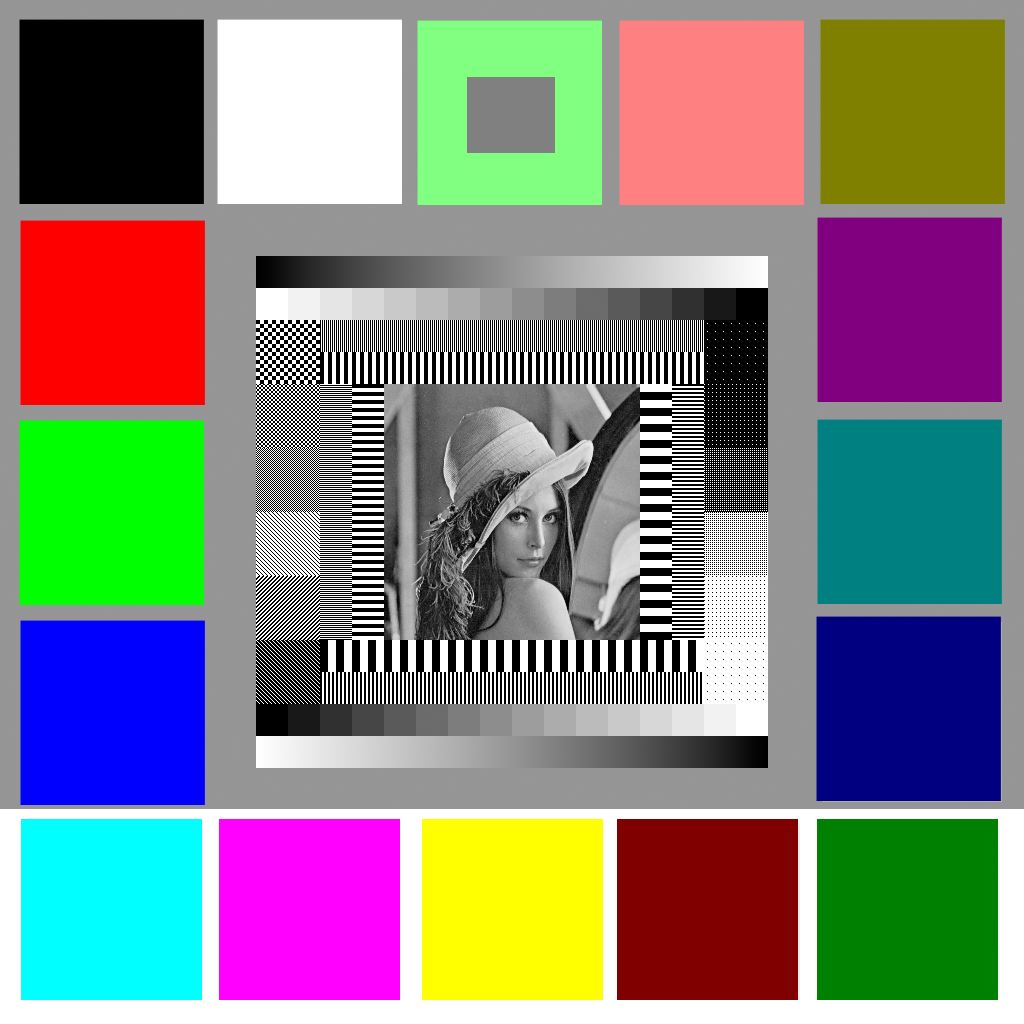

In [33]:
bandas_rgb = conversor_bandas(img)
img_result1 = mediana(1, 1, bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

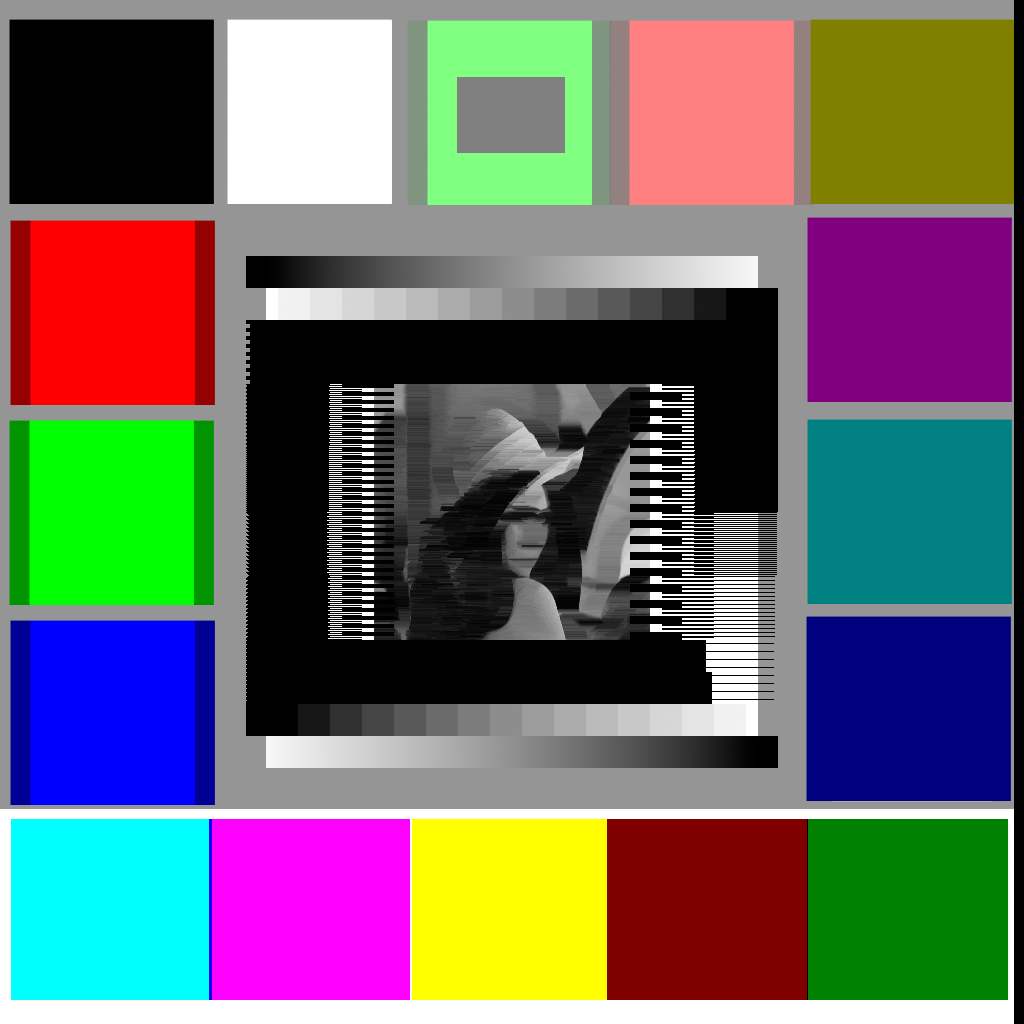

In [37]:
bandas_rgb = conversor_bandas(img)
img_result1 = mediana(1, 21, bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

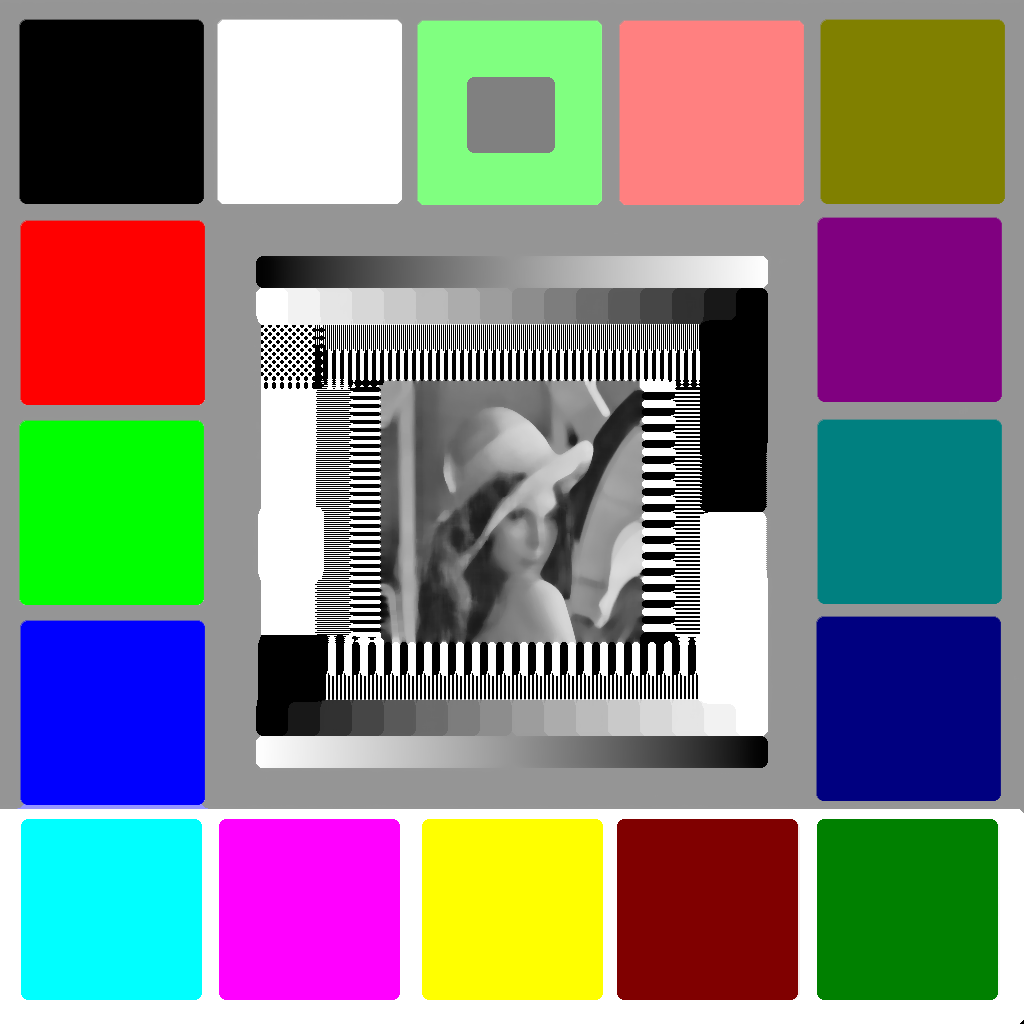

In [ ]:
bandas_rgb = conversor_bandas(img)
img_result1 = mediana(11, 11, bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

In [ ]:
img_test2 = Image.open('drive/MyDrive/2022.2_PDI/DancingInWater.jpg')
display(img_test2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img_test2 = Image.open('drive/MyDrive/2022.2_PDI/DancingInWater.jpg')
bandas_rgb = conversor_bandas(img_test2)
img_result1 = mediana(11, 11, bandas_rgb)
img_result = truncate_correlation(img_result1)
img_final = conversor_array(img_result)
bandas_final = np.array(img_final, dtype='uint8')
new_image = Image.fromarray(bandas_final, "RGB")
new_image

Output hidden; open in https://colab.research.google.com to view.